In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorflow

In [ ]:
# import shutil

# # Define the path to the directory you want to delete
# dir_to_delete = '/content/drive/MyDrive/ENTS - H101/ML/Dataset Preparation/Last Images'

# # Delete the directory and all its contents
# shutil.rmtree(dir_to_delete)

# print(f'Directory "{dir_to_delete}" and all its contents have been deleted.')



Directory "/content/drive/MyDrive/ENTS - H101/ML/Dataset Preparation/Last Images" and all its contents have been deleted.


In [ ]:
# import os
# import shutil

# # Define the source and target directories
# source_dir = '/content/drive/MyDrive/ENTS - H101/ML/Dataset Preparation/Extracted Images'
# target_dir = '/content/drive/MyDrive/ENTS - H101/ML/Dataset Preparation/Last Images'

# # Iterate over each subdirectory in the source directory
# for subdir in os.listdir(source_dir):
#     subdir_path = os.path.join(source_dir, subdir)

#     # Ensure it is a directory
#     if os.path.isdir(subdir_path):
#         images = {}

#         # Iterate over each file in the subdirectory
#         for filename in os.listdir(subdir_path):
#             if filename.endswith('.jpg'):
#                 picture_id, sub_id = filename.rsplit('_', 1)
#                 sub_id = sub_id.split('.')[0]  # Remove the file extension

#                 # Convert sub_id to an integer for comparison
#                 if picture_id not in images:
#                     images[picture_id] = int(sub_id)
#                 else:
#                     images[picture_id] = max(images[picture_id], int(sub_id))

#         # Create the corresponding subdirectory in the target directory
#         target_subdir = os.path.join(target_dir, subdir)
#         os.makedirs(target_subdir, exist_ok=True)

#         # Copy the last sub-ID image for each picture ID to the target subdirectory
#         for picture_id, max_sub_id in images.items():
#             source_file = os.path.join(subdir_path, f'{picture_id}_{max_sub_id}.jpg')
#             target_file = os.path.join(target_subdir, f'{picture_id}_{max_sub_id}.jpg')
#             shutil.copy2(source_file, target_file)

# print("Last images copied successfully with the subdirectory structure.")


Last images copied successfully with the subdirectory structure.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

**WITHOUT PRETRAINED MODEL**

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# # Check if GPU is available
# print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
# print("TensorFlow version:", tf.__version__)

# # ImageDataGenerator for training data
# train_datagen = ImageDataGenerator(
#     rescale=1./255,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True
# )

# # Directory with training images
# train_generator = train_datagen.flow_from_directory(
#     '/content/drive/MyDrive/ENTS - H101/ML/Dataset Preparation/Last Images',
#     target_size=(150, 150),
#     batch_size=64,  # Adjust batch size based on GPU memory
#     class_mode='sparse'
# )

# # Model definition
# model = Sequential([
#     Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
#     MaxPooling2D((2, 2)),
#     Conv2D(64, (3, 3), activation='relu'),
#     MaxPooling2D((2, 2)),
#     Conv2D(128, (3, 3), activation='relu'),
#     MaxPooling2D((2, 2)),

#     Flatten(),
#     Dense(256, activation='relu'),  # Reduced complexity
#     Dense(10, activation='softmax')
# ])

# # Compile model
# model.compile(loss='sparse_categorical_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])

# # Fit the model
# history = model.fit(
#     train_generator,
#     steps_per_epoch=train_generator.samples // train_generator.batch_size,
#     epochs=10,  # Start with fewer epochs for testing
# )


Num GPUs Available:  1
TensorFlow version: 2.15.0
Found 956 images belonging to 10 classes.
Epoch 1/10
14/14 [==============================] - 21s 1s/step - loss: 2.3118 - accuracy: 0.2534
Epoch 2/10
14/14 [==============================] - 22s 2s/step - loss: 1.9701 - accuracy: 0.3666
Epoch 3/10
14/14 [==============================] - 21s 1s/step - loss: 1.6521 - accuracy: 0.4439
Epoch 4/10
14/14 [==============================] - 21s 2s/step - loss: 1.4663 - accuracy: 0.5269
Epoch 5/10
14/14 [==============================] - 20s 1s/step - loss: 1.3662 - accuracy: 0.5572
Epoch 6/10
14/14 [==============================] - 21s 1s/step - loss: 1.2379 - accuracy: 0.5886
Epoch 7/10
14/14 [==============================] - 22s 2s/step - loss: 1.1516 - accuracy: 0.6211
Epoch 8/10
14/14 [==============================] - 22s 2s/step - loss: 1.0900 - accuracy: 0.6278
Epoch 9/10
12/14 [========================>.....] - ETA: 3s - loss: 1.0492 - accuracy: 0.6270

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
# from tensorflow.keras.applications import MobileNetV2
# from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
# from tensorflow.keras.optimizers import Adam

# # Check if GPU is available
# print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
# print("TensorFlow version:", tf.__version__)

# # ImageDataGenerator for training data
# train_datagen = ImageDataGenerator(
#     preprocessing_function=preprocess_input,  # Use MobileNetV2 preprocessing
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True
# )

# # Directory with training images
# train_generator = train_datagen.flow_from_directory(
#     '/content/drive/MyDrive/ENTS - H101/ML/Dataset Preparation/Last Images',
#     target_size=(224, 224),  # MobileNetV2 default input size
#     batch_size=32,  # Adjust batch size based on GPU memory
#     class_mode='sparse'
# )

# # Load the MobileNetV2 model with weights pre-trained on ImageNet, excluding the top layer
# base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# # Freeze the base model
# base_model.trainable = False

# # Create the model
# model = Sequential([
#     base_model,
#     GlobalAveragePooling2D(),
#     Dense(256, activation='relu'),
#     Dense(train_generator.num_classes, activation='softmax')  # Use the number of classes in your dataset
# ])

# # Compile model
# model.compile(loss='sparse_categorical_crossentropy',
#               optimizer=Adam(learning_rate=0.001),
#               metrics=['accuracy'])

# # Fit the model
# history = model.fit(
#     train_generator,
#     steps_per_epoch=train_generator.samples // train_generator.batch_size,
#     epochs=10,  # Start with 10 epochs for testing, can be increased
# )

# # Optionally, unfreeze some layers and fine-tune the model
# base_model.trainable = True
# # Compile the model again after unfreezing layers
# model.compile(loss='sparse_categorical_crossentropy',
#               optimizer=Adam(learning_rate=0.00001),
#               metrics=['accuracy'])

# history_fine = model.fit(
#     train_generator,
#     steps_per_epoch=train_generator.samples // train_generator.batch_size,
#     epochs=10  # Additional epochs for fine-tuning
# )


Num GPUs Available:  1
TensorFlow version: 2.15.0
Found 956 images belonging to 10 classes.
9406464/9406464 [==============================] - 0s 0us/step
Epoch 1/10
29/29 [==============================] - 32s 926ms/step - loss: 1.2803 - accuracy: 0.5985
Epoch 2/10
29/29 [==============================] - 28s 969ms/step - loss: 0.6463 - accuracy: 0.7814
Epoch 3/10
29/29 [==============================] - 27s 947ms/step - loss: 0.4906 - accuracy: 0.8182
Epoch 4/10
29/29 [==============================] - 28s 966ms/step - loss: 0.4290 - accuracy: 0.8474
Epoch 5/10
29/29 [==============================] - 27s 929ms/step - loss: 0.3141 - accuracy: 0.9048
Epoch 6/10
29/29 [==============================] - 27s 942ms/step - loss: 0.3131 - accuracy: 0.8864
Epoch 7/10
29/29 [==============================] - 27s 933ms/step - loss: 0.2755 - accuracy: 0.8950
Epoch 8/10
29/29 [==============================] - 27s 949ms/step - loss: 0.2199 - accuracy: 0.9221
Epoch 9/10
29/29 [===================

In [ ]:
# ADD MOBILE NET V2

**INI YANG DIPAKE YANG FROZEN 🥶**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Check if GPU is available
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print("TensorFlow version:", tf.__version__)

# ImageDataGenerator for training data
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,  # Use MobileNetV2 preprocessing
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Directory with training images
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/ENTS - H101/ML/Dataset Preparation/Last Images',
    target_size=(224, 224),  # MobileNetV2 default input size
    batch_size=32,  # Adjust batch size based on GPU memory
    class_mode='sparse'
)

# Load the MobileNetV2 model with weights pre-trained on ImageNet, excluding the top layer
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Freeze the base model
base_model.trainable = False

# Create the model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')  # Use the number of classes in your dataset
])

# Compile model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

# Callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, verbose=1, min_lr=0.00001)

# Fit the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    callbacks=[reduce_lr]
)

# Save the model after initial training with frozen layers
model.save('/content/drive/MyDrive/ENTS - H101/ML/model/model_frozen.h5')

# Optionally, save in TensorFlow SavedModel format
# model.save('/content/drive/MyDrive/ENTS - H101/ML/Model/frozen', save_format='tf')

# Unfreeze some layers and fine-tune the model
base_model.trainable = True

# Compile the model again after unfreezing layers
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(learning_rate=0.00001),  # Lower learning rate for fine-tuning
              metrics=['accuracy'])

# Fine-tune the model
history_fine = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    callbacks=[reduce_lr]
)

# Save the model after fine-tuning with unfrozen layers
model.save('/content/drive/MyDrive/ENTS - H101/ML/model/model_unfrozen.h5')

# Optionally, save in TensorFlow SavedModel format
# model.save('/content/drive/MyDrive/ENTS - H101/ML/Model/unfrozen', save_format='tf')


Num GPUs Available:  1
TensorFlow version: 2.15.0
Found 956 images belonging to 10 classes.
Epoch 1/10
29/29 [==============================] - ETA: 0s - loss: 1.2689 - accuracy: 0.5942

29/29 [==============================] - 190s 6s/step - loss: 1.2689 - accuracy: 0.5942 - lr: 0.0010
Epoch 2/10
29/29 [==============================] - ETA: 0s - loss: 0.7177 - accuracy: 0.7511

29/29 [==============================] - 25s 845ms/step - loss: 0.7177 - accuracy: 0.7511 - lr: 0.0010
Epoch 3/10
29/29 [==============================] - ETA: 0s - loss: 0.5097 - accuracy: 0.8193

29/29 [==============================] - 25s 878ms/step - loss: 0.5097 - accuracy: 0.8193 - lr: 0.0010
Epoch 4/10
29/29 [==============================] - ETA: 0s - loss: 0.3916 - accuracy: 0.8690

29/29 [==============================] - 26s 889ms/step - loss: 0.3916 - accuracy: 0.8690 - lr: 0.0010
Epoch 5/10
29/29 [==============================] - ETA: 0s - loss: 0.3705 - accuracy: 0.8701

29/29 [==============================] - 28s 960ms/step - loss: 0.3705 - accuracy: 0.8701 - lr: 0.0010
Epoch 6/10
29/29 [==============================] - ETA: 0s - loss: 0.2654 - accuracy: 0.9167

29/29 [==============================] - 26s 912ms/step - loss: 0.2654 - accuracy: 0.9167 - lr: 0.0010
Epoch 7/10
29/29 [==============================] - ETA: 0s - loss: 0.2531 - accuracy: 0.9102

29/29 [==============================] - 25s 877ms/step - loss: 0.2531 - accuracy: 0.9102 - lr: 0.0010
Epoch 8/10
29/29 [==============================] - ETA: 0s - loss: 0.2259 - accuracy: 0.9286

29/29 [==============================] - 25s 862ms/step - loss: 0.2259 - accuracy: 0.9286 - lr: 0.0010
Epoch 9/10
29/29 [==============================] - ETA: 0s - loss: 0.2037 - accuracy: 0.9361

29/29 [==============================] - 25s 878ms/step - loss: 0.2037 - accuracy: 0.9361 - lr: 0.0010
Epoch 10/10
29/29 [==============================] - ETA: 0s - loss: 0.1702 - accuracy: 0.9426

29/29 [==============================] - 27s 932ms/step - loss: 0.1702 - accuracy: 0.9426 - lr: 0.0010


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/10
29/29 [==============================] - ETA: 0s - loss: 3.0305 - accuracy: 0.3420

29/29 [==============================] - 57s 953ms/step - loss: 3.0305 - accuracy: 0.3420 - lr: 1.0000e-05
Epoch 2/10
29/29 [==============================] - ETA: 0s - loss: 1.5124 - accuracy: 0.5400

29/29 [==============================] - 27s 941ms/step - loss: 1.5124 - accuracy: 0.5400 - lr: 1.0000e-05
Epoch 3/10
29/29 [==============================] - ETA: 0s - loss: 1.0986 - accuracy: 0.6234

29/29 [==============================] - 27s 943ms/step - loss: 1.0986 - accuracy: 0.6234 - lr: 1.0000e-05
Epoch 4/10
29/29 [==============================] - ETA: 0s - loss: 0.9072 - accuracy: 0.6861

29/29 [==============================] - 27s 926ms/step - loss: 0.9072 - accuracy: 0.6861 - lr: 1.0000e-05
Epoch 5/10
29/29 [==============================] - ETA: 0s - loss: 0.8335 - accuracy: 0.7110

29/29 [==============================] - 28s 960ms/step - loss: 0.8335 - accuracy: 0.7110 - lr: 1.0000e-05
Epoch 6/10
29/29 [==============================] - ETA: 0s - loss: 0.7018 - accuracy: 0.7608

29/29 [==============================] - 28s 958ms/step - loss: 0.7018 - accuracy: 0.7608 - lr: 1.0000e-05
Epoch 7/10
29/29 [==============================] - ETA: 0s - loss: 0.6636 - accuracy: 0.7630

29/29 [==============================] - 27s 916ms/step - loss: 0.6636 - accuracy: 0.7630 - lr: 1.0000e-05
Epoch 8/10
29/29 [==============================] - ETA: 0s - loss: 0.6108 - accuracy: 0.7803

29/29 [==============================] - 26s 879ms/step - loss: 0.6108 - accuracy: 0.7803 - lr: 1.0000e-05
Epoch 9/10
29/29 [==============================] - ETA: 0s - loss: 0.5804 - accuracy: 0.8041

29/29 [==============================] - 26s 884ms/step - loss: 0.5804 - accuracy: 0.8041 - lr: 1.0000e-05
Epoch 10/10
29/29 [==============================] - ETA: 0s - loss: 0.5235 - accuracy: 0.8030

29/29 [==============================] - 26s 889ms/step - loss: 0.5235 - accuracy: 0.8030 - lr: 1.0000e-05


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
import json

# Check if GPU is available
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print("TensorFlow version:", tf.__version__)

# ImageDataGenerator for training data
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,  # Use MobileNetV2 preprocessing
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Directory with training images
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/ENTS - H101/ML/Dataset Preparation/Last Images',
    target_size=(224, 224),  # MobileNetV2 default input size
    batch_size=32,  # Adjust batch size based on GPU memory
    class_mode='sparse'
)

# Save class indices
class_indices = train_generator.class_indices
with open('/content/drive/MyDrive/ENTS - H101/ML/model/class_indices.json', 'w') as f:
    json.dump(class_indices, f)

# Load the MobileNetV2 model with weights pre-trained on ImageNet, excluding the top layer
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Freeze the base model
base_model.trainable = False

# Create the model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dense(len(class_indices), activation='softmax')  # Use the number of classes in your dataset
])

# Compile model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

# Callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, verbose=1, min_lr=0.00001)

# Fit the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    callbacks=[reduce_lr]
)

# Save the model after initial training with frozen layers
model.save('/content/drive/MyDrive/ENTS - H101/ML/model/model_category.h5')


Num GPUs Available:  0
TensorFlow version: 2.15.0
Found 956 images belonging to 10 classes.
Epoch 1/10
29/29 [==============================] - ETA: 0s - loss: 1.3020 - accuracy: 0.5963

29/29 [==============================] - 93s 3s/step - loss: 1.3020 - accuracy: 0.5963 - lr: 0.0010
Epoch 2/10
29/29 [==============================] - ETA: 0s - loss: 0.6602 - accuracy: 0.7727

29/29 [==============================] - 76s 3s/step - loss: 0.6602 - accuracy: 0.7727 - lr: 0.0010
Epoch 3/10
29/29 [==============================] - ETA: 0s - loss: 0.5034 - accuracy: 0.8182

29/29 [==============================] - 82s 3s/step - loss: 0.5034 - accuracy: 0.8182 - lr: 0.0010
Epoch 4/10
29/29 [==============================] - ETA: 0s - loss: 0.3993 - accuracy: 0.8582

29/29 [==============================] - 75s 3s/step - loss: 0.3993 - accuracy: 0.8582 - lr: 0.0010
Epoch 5/10
29/29 [==============================] - ETA: 0s - loss: 0.3347 - accuracy: 0.8820

29/29 [==============================] - 75s 3s/step - loss: 0.3347 - accuracy: 0.8820 - lr: 0.0010
Epoch 6/10
29/29 [==============================] - ETA: 0s - loss: 0.3397 - accuracy: 0.8777

29/29 [==============================] - 80s 3s/step - loss: 0.3397 - accuracy: 0.8777 - lr: 0.0010
Epoch 7/10
29/29 [==============================] - ETA: 0s - loss: 0.2791 - accuracy: 0.9015

29/29 [==============================] - 73s 2s/step - loss: 0.2791 - accuracy: 0.9015 - lr: 0.0010
Epoch 8/10
29/29 [==============================] - ETA: 0s - loss: 0.2174 - accuracy: 0.9297

29/29 [==============================] - 76s 3s/step - loss: 0.2174 - accuracy: 0.9297 - lr: 0.0010
Epoch 9/10
29/29 [==============================] - ETA: 0s - loss: 0.1870 - accuracy: 0.9372

29/29 [==============================] - 77s 3s/step - loss: 0.1870 - accuracy: 0.9372 - lr: 0.0010
Epoch 10/10
29/29 [==============================] - ETA: 0s - loss: 0.1562 - accuracy: 0.9556

29/29 [==============================] - 76s 3s/step - loss: 0.1562 - accuracy: 0.9556 - lr: 0.0010


**TESTING PREDICTIONNNNNNN 👀**

Saving ESS27.png to ESS27.png
1/1 [==============================] - 2s 2s/step
Predicted label: blazers


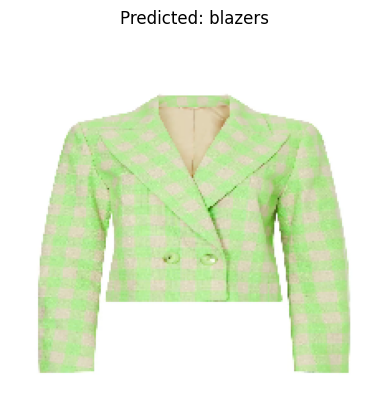

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import json

# Load the saved model
model_path = '/content/drive/MyDrive/ENTS - H101/ML/model/model_frozen.h5'
model = load_model(model_path)

# Load class indices
class_indices_path = '/content/drive/MyDrive/ENTS - H101/ML/model/class_indices.json'
with open(class_indices_path, 'r') as f:
    class_indices = json.load(f)
    class_labels = {v: k for k, v in class_indices.items()}

# Function to predict user-uploaded image
def predict_uploaded_image():
    # Upload image
    uploaded = files.upload()
    image_path = list(uploaded.keys())[0]

    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(224, 224))  # Ensure the target size matches the model's input size
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)  # Ensure the preprocessing matches the training phase

    # Make a prediction
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)

    # Map the predicted class to its label
    predicted_label = class_labels[predicted_class[0]]

    print(f'Predicted label: {predicted_label}')

    # Display the image with prediction
    plt.imshow(img)
    plt.title(f'Predicted: {predicted_label}')
    plt.axis('off')
    plt.show()

# Call the function to predict uploaded image
predict_uploaded_image()


Saving FAVD17.png to FAVD17 (1).png
1/1 [==============================] - 0s 71ms/step
Predicted label: blazers


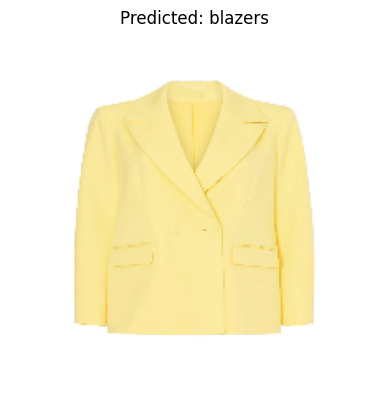

In [ ]:
# Call the function to predict uploaded image
predict_uploaded_image()

Saving KS369.png to KS369 (1).png
1/1 [==============================] - 0s 61ms/step
Predicted label: dresses


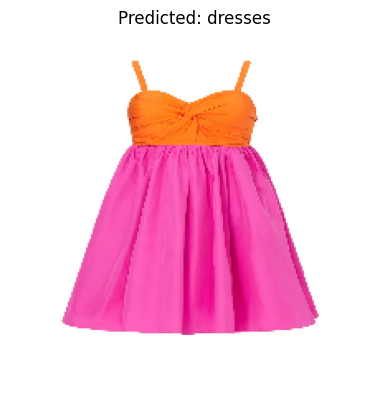

In [ ]:
# Call the function to predict uploaded image
predict_uploaded_image()

Saving CRK30.png to CRK30 (1).png
1/1 [==============================] - 0s 84ms/step
Predicted label: pants


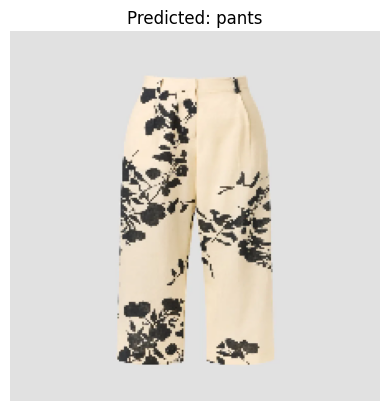

In [ ]:
# Call the function to predict uploaded image
predict_uploaded_image()

Saving LOU210.png to LOU210 (1).png
1/1 [==============================] - 0s 99ms/step
Predicted label: shorts


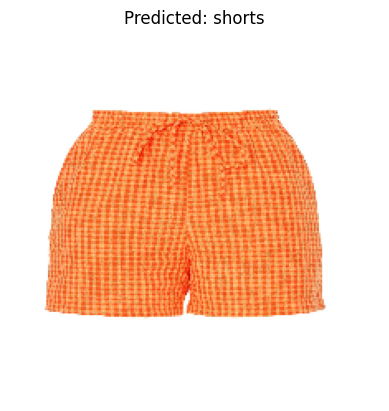

In [ ]:
# Call the function to predict uploaded image
predict_uploaded_image()

Saving KS369.png to KS369.png
1/1 [==============================] - 0s 82ms/step
Predicted label: dresses


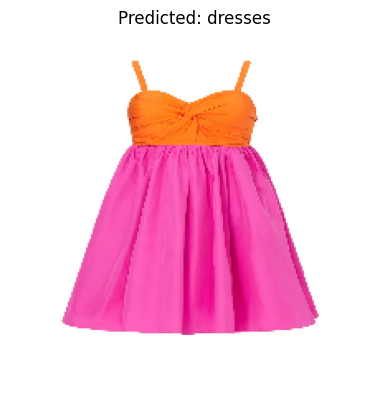

In [ ]:
# Call the function to predict uploaded image
predict_uploaded_image()

Saving BM748.png to BM748 (1).png
1/1 [==============================] - 0s 76ms/step
Predicted label: dresses


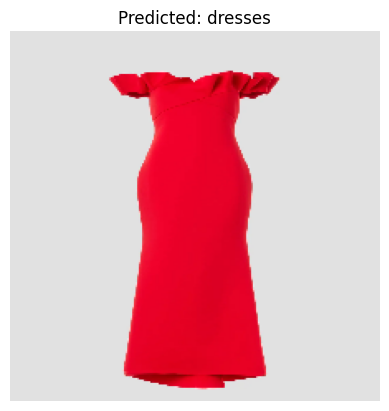

In [ ]:
# Call the function to predict uploaded image
predict_uploaded_image()

Saving RL181.png to RL181 (1).png
1/1 [==============================] - 0s 73ms/step
Predicted label: dresses


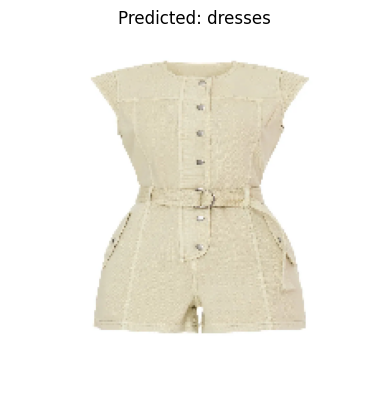

In [ ]:
# Call the function to predict uploaded image
predict_uploaded_image()

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.models import load_model
# from tensorflow.keras.preprocessing import image
# from tensorflow.keras.applications.mobilenet_v2 import preprocess_input  # Import preprocess_input
# import numpy as np
# import matplotlib.pyplot as plt
# from google.colab import files

# # Load the saved model
# model_path = '/content/drive/MyDrive/ENTS - H101/ML/model/model_frozen.h5'
# model = load_model(model_path)

# # Function to predict user-uploaded image
# def predict_uploaded_image():
#     # Upload image
#     uploaded = files.upload()
#     image_path = list(uploaded.keys())[0]

#     # Load and preprocess the image
#     img = image.load_img(image_path, target_size=(224, 224))  # Ensure the target size matches the model's input size
#     img_array = image.img_to_array(img)
#     img_array = np.expand_dims(img_array, axis=0)
#     img_array = preprocess_input(img_array)  # Ensure the preprocessing matches the training phase

#     # Make a prediction
#     predictions = model.predict(img_array)
#     predicted_class = np.argmax(predictions, axis=1)

#     # Assuming you have a class indices dictionary
#     # Here, `train_generator.class_indices` is used to get the mapping
#     class_indices = train_generator.class_indices
#     class_labels = {v: k for k, v in class_indices.items()}

#     # Map the predicted class to its label
#     predicted_label = class_labels[predicted_class[0]]

#     print(f'Predicted label: {predicted_label}')

#     # Display the image with prediction
#     plt.imshow(img)
#     plt.title(f'Predicted: {predicted_label}')
#     plt.axis('off')
#     plt.show()

# # Call the function to predict uploaded image
# predict_uploaded_image()


Saving cb.png to cb (1).png
1/1 [==============================] - 2s 2s/step


NameError: name 'train_generator' is not defined

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Check if GPU is available
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print("TensorFlow version:", tf.__version__)

# ImageDataGenerator for training data
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,  # Use MobileNetV2 preprocessing
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Directory with training images
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/ENTS - H101/ML/Dataset Preparation/Last Images',
    target_size=(224, 224),  # MobileNetV2 default input size
    batch_size=32,  # Adjust batch size based on GPU memory
    class_mode='sparse'
)

# Load the MobileNetV2 model with weights pre-trained on ImageNet, excluding the top layer
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Freeze the base model
base_model.trainable = False

# Create the model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')  # Use the number of classes in your dataset
])

# Compile model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

# Callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, verbose=1, min_lr=0.00001)

# Fit the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    callbacks=[reduce_lr]
)

# Optionally, unfreeze some layers and fine-tune the model
base_model.trainable = True

# Compile the model again after unfreezing layers
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(learning_rate=0.00001),  # Lower learning rate for fine-tuning
              metrics=['accuracy'])

# Fine-tune the model
history_fine = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    callbacks=[reduce_lr]
)


Num GPUs Available:  0
TensorFlow version: 2.15.0
Found 956 images belonging to 10 classes.
Epoch 1/10
29/29 [==============================] - ETA: 0s - loss: 1.3462 - accuracy: 0.5758

29/29 [==============================] - 66s 2s/step - loss: 1.3462 - accuracy: 0.5758 - lr: 0.0010
Epoch 2/10
29/29 [==============================] - ETA: 0s - loss: 0.7048 - accuracy: 0.7608

29/29 [==============================] - 66s 2s/step - loss: 0.7048 - accuracy: 0.7608 - lr: 0.0010
Epoch 3/10
29/29 [==============================] - ETA: 0s - loss: 0.5147 - accuracy: 0.8084

29/29 [==============================] - 64s 2s/step - loss: 0.5147 - accuracy: 0.8084 - lr: 0.0010
Epoch 4/10
29/29 [==============================] - ETA: 0s - loss: 0.4514 - accuracy: 0.8355

29/29 [==============================] - 62s 2s/step - loss: 0.4514 - accuracy: 0.8355 - lr: 0.0010
Epoch 5/10
29/29 [==============================] - ETA: 0s - loss: 0.3293 - accuracy: 0.8820

29/29 [==============================] - 62s 2s/step - loss: 0.3293 - accuracy: 0.8820 - lr: 0.0010
Epoch 6/10
29/29 [==============================] - ETA: 0s - loss: 0.2990 - accuracy: 0.9015

29/29 [==============================] - 65s 2s/step - loss: 0.2990 - accuracy: 0.9015 - lr: 0.0010
Epoch 7/10
29/29 [==============================] - ETA: 0s - loss: 0.2797 - accuracy: 0.8994

29/29 [==============================] - 62s 2s/step - loss: 0.2797 - accuracy: 0.8994 - lr: 0.0010
Epoch 8/10
29/29 [==============================] - ETA: 0s - loss: 0.2288 - accuracy: 0.9242

29/29 [==============================] - 63s 2s/step - loss: 0.2288 - accuracy: 0.9242 - lr: 0.0010
Epoch 9/10
29/29 [==============================] - ETA: 0s - loss: 0.2094 - accuracy: 0.9275

29/29 [==============================] - 62s 2s/step - loss: 0.2094 - accuracy: 0.9275 - lr: 0.0010
Epoch 10/10
29/29 [==============================] - ETA: 0s - loss: 0.1863 - accuracy: 0.9426

29/29 [==============================] - 65s 2s/step - loss: 0.1863 - accuracy: 0.9426 - lr: 0.0010
Epoch 1/10
29/29 [==============================] - ETA: 0s - loss: 2.6662 - accuracy: 0.3766

29/29 [==============================] - 221s 7s/step - loss: 2.6662 - accuracy: 0.3766 - lr: 1.0000e-05
Epoch 2/10
29/29 [==============================] - ETA: 0s - loss: 1.4107 - accuracy: 0.5628

29/29 [==============================] - 206s 7s/step - loss: 1.4107 - accuracy: 0.5628 - lr: 1.0000e-05
Epoch 3/10
29/29 [==============================] - ETA: 0s - loss: 1.0584 - accuracy: 0.6061

29/29 [==============================] - 204s 7s/step - loss: 1.0584 - accuracy: 0.6061 - lr: 1.0000e-05
Epoch 4/10
29/29 [==============================] - ETA: 0s - loss: 0.9017 - accuracy: 0.6742

29/29 [==============================] - 202s 7s/step - loss: 0.9017 - accuracy: 0.6742 - lr: 1.0000e-05
Epoch 5/10
29/29 [==============================] - ETA: 0s - loss: 0.7626 - accuracy: 0.7154

29/29 [==============================] - 205s 7s/step - loss: 0.7626 - accuracy: 0.7154 - lr: 1.0000e-05
Epoch 6/10
29/29 [==============================] - ETA: 0s - loss: 0.6711 - accuracy: 0.7695

29/29 [==============================] - 201s 7s/step - loss: 0.6711 - accuracy: 0.7695 - lr: 1.0000e-05
Epoch 7/10
29/29 [==============================] - ETA: 0s - loss: 0.6567 - accuracy: 0.7554

29/29 [==============================] - 201s 7s/step - loss: 0.6567 - accuracy: 0.7554 - lr: 1.0000e-05
Epoch 8/10
29/29 [==============================] - ETA: 0s - loss: 0.5791 - accuracy: 0.8052

29/29 [==============================] - 200s 7s/step - loss: 0.5791 - accuracy: 0.8052 - lr: 1.0000e-05
Epoch 9/10
29/29 [==============================] - ETA: 0s - loss: 0.5820 - accuracy: 0.7944

29/29 [==============================] - 199s 7s/step - loss: 0.5820 - accuracy: 0.7944 - lr: 1.0000e-05
Epoch 10/10
29/29 [==============================] - ETA: 0s - loss: 0.4927 - accuracy: 0.8312

29/29 [==============================] - 204s 7s/step - loss: 0.4927 - accuracy: 0.8312 - lr: 1.0000e-05


Saving cb.png to cb.png
1/1 [==============================] - 1s 999ms/step
Predicted label: tops


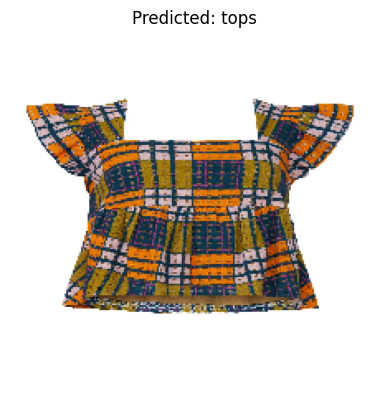

In [ ]:
import matplotlib.pyplot as plt
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np

# Function to predict user-uploaded image
def predict_uploaded_image():
    # Upload image
    uploaded = files.upload()
    image_path = list(uploaded.keys())[0]

    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Make a prediction
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)

    # Assuming you have a class indices dictionary
    class_indices = train_generator.class_indices
    class_labels = {v: k for k, v in class_indices.items()}

    # Map the predicted class to its label
    predicted_label = class_labels[predicted_class[0]]

    print(f'Predicted label: {predicted_label}')

    # Display the image with prediction
    plt.imshow(img)
    plt.title(f'Predicted: {predicted_label}')
    plt.axis('off')
    plt.show()

# Call the function to predict uploaded image
predict_uploaded_image()

Saving UJ169.png to UJ169.png
1/1 [==============================] - 0s 51ms/step
Predicted label: dresses


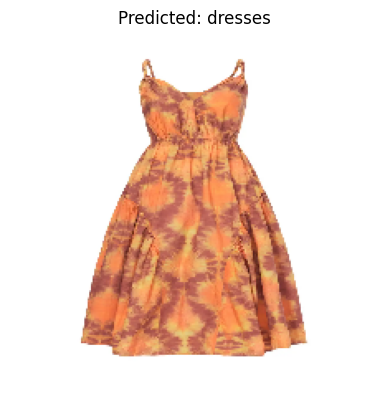

In [ ]:
import matplotlib.pyplot as plt
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np

# Function to predict user-uploaded image
def predict_uploaded_image():
    # Upload image
    uploaded = files.upload()
    image_path = list(uploaded.keys())[0]

    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Make a prediction
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)

    # Assuming you have a class indices dictionary
    class_indices = train_generator.class_indices
    class_labels = {v: k for k, v in class_indices.items()}

    # Map the predicted class to its label
    predicted_label = class_labels[predicted_class[0]]

    print(f'Predicted label: {predicted_label}')

    # Display the image with prediction
    plt.imshow(img)
    plt.title(f'Predicted: {predicted_label}')
    plt.axis('off')
    plt.show()

# Call the function to predict uploaded image
predict_uploaded_image()

Saving KS369.png to KS369.png
1/1 [==============================] - 0s 67ms/step
Predicted label: dresses


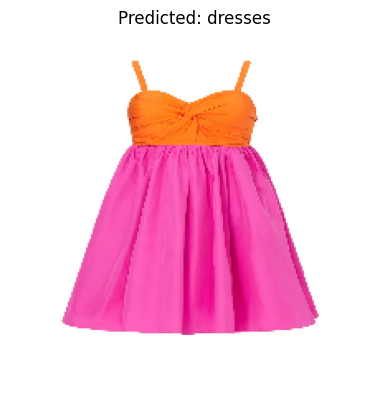

In [ ]:
import matplotlib.pyplot as plt
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np

# Function to predict user-uploaded image
def predict_uploaded_image():
    # Upload image
    uploaded = files.upload()
    image_path = list(uploaded.keys())[0]

    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Make a prediction
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)

    # Assuming you have a class indices dictionary
    class_indices = train_generator.class_indices
    class_labels = {v: k for k, v in class_indices.items()}

    # Map the predicted class to its label
    predicted_label = class_labels[predicted_class[0]]

    print(f'Predicted label: {predicted_label}')

    # Display the image with prediction
    plt.imshow(img)
    plt.title(f'Predicted: {predicted_label}')
    plt.axis('off')
    plt.show()

# Call the function to predict uploaded image
predict_uploaded_image()

Saving FAVD17.png to FAVD17.png
1/1 [==============================] - 0s 60ms/step
Predicted label: blazers


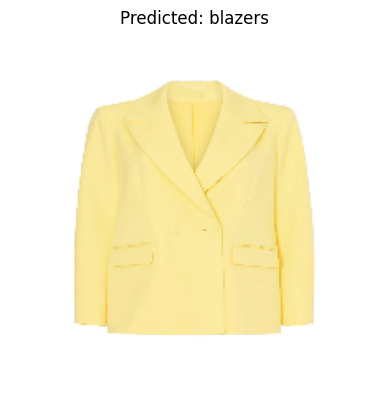

In [ ]:
import matplotlib.pyplot as plt
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np

# Function to predict user-uploaded image
def predict_uploaded_image():
    # Upload image
    uploaded = files.upload()
    image_path = list(uploaded.keys())[0]

    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Make a prediction
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)

    # Assuming you have a class indices dictionary
    class_indices = train_generator.class_indices
    class_labels = {v: k for k, v in class_indices.items()}

    # Map the predicted class to its label
    predicted_label = class_labels[predicted_class[0]]

    print(f'Predicted label: {predicted_label}')

    # Display the image with prediction
    plt.imshow(img)
    plt.title(f'Predicted: {predicted_label}')
    plt.axis('off')
    plt.show()

# Call the function to predict uploaded image
predict_uploaded_image()

Saving CRK30.png to CRK30.png
1/1 [==============================] - 0s 80ms/step
Predicted label: pants


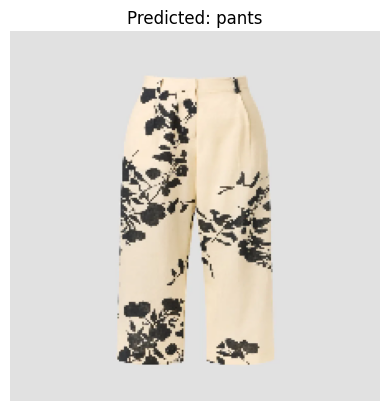

In [ ]:
import matplotlib.pyplot as plt
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np

# Function to predict user-uploaded image
def predict_uploaded_image():
    # Upload image
    uploaded = files.upload()
    image_path = list(uploaded.keys())[0]

    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Make a prediction
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)

    # Assuming you have a class indices dictionary
    class_indices = train_generator.class_indices
    class_labels = {v: k for k, v in class_indices.items()}

    # Map the predicted class to its label
    predicted_label = class_labels[predicted_class[0]]

    print(f'Predicted label: {predicted_label}')

    # Display the image with prediction
    plt.imshow(img)
    plt.title(f'Predicted: {predicted_label}')
    plt.axis('off')
    plt.show()

# Call the function to predict uploaded image
predict_uploaded_image()

Saving LOU210.png to LOU210.png
1/1 [==============================] - 0s 53ms/step
Predicted label: shorts


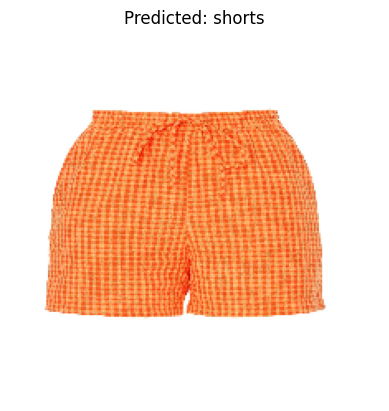

In [ ]:
import matplotlib.pyplot as plt
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np

# Function to predict user-uploaded image
def predict_uploaded_image():
    # Upload image
    uploaded = files.upload()
    image_path = list(uploaded.keys())[0]

    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Make a prediction
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)

    # Assuming you have a class indices dictionary
    class_indices = train_generator.class_indices
    class_labels = {v: k for k, v in class_indices.items()}

    # Map the predicted class to its label
    predicted_label = class_labels[predicted_class[0]]

    print(f'Predicted label: {predicted_label}')

    # Display the image with prediction
    plt.imshow(img)
    plt.title(f'Predicted: {predicted_label}')
    plt.axis('off')
    plt.show()

# Call the function to predict uploaded image
predict_uploaded_image()

Saving LSH84.png to LSH84.png
1/1 [==============================] - 0s 59ms/step
Predicted label: skirts


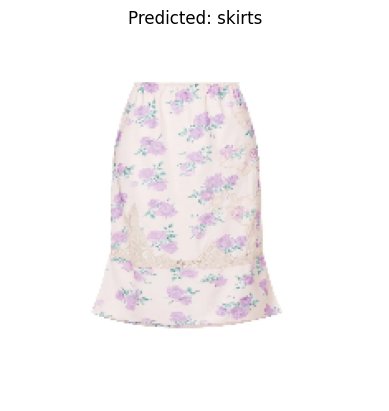

In [ ]:
import matplotlib.pyplot as plt
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np

# Function to predict user-uploaded image
def predict_uploaded_image():
    # Upload image
    uploaded = files.upload()
    image_path = list(uploaded.keys())[0]

    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Make a prediction
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)

    # Assuming you have a class indices dictionary
    class_indices = train_generator.class_indices
    class_labels = {v: k for k, v in class_indices.items()}

    # Map the predicted class to its label
    predicted_label = class_labels[predicted_class[0]]

    print(f'Predicted label: {predicted_label}')

    # Display the image with prediction
    plt.imshow(img)
    plt.title(f'Predicted: {predicted_label}')
    plt.axis('off')
    plt.show()

# Call the function to predict uploaded image
predict_uploaded_image()

Saving RL181.png to RL181.png
1/1 [==============================] - 0s 59ms/step
Predicted label: dresses


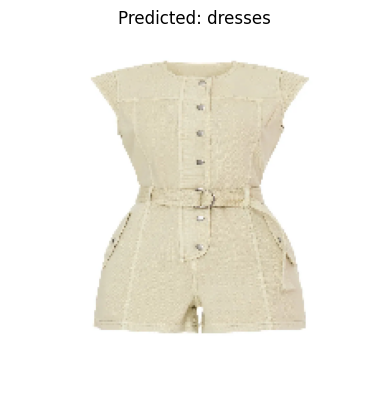

In [ ]:
import matplotlib.pyplot as plt
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np

# Function to predict user-uploaded image
def predict_uploaded_image():
    # Upload image
    uploaded = files.upload()
    image_path = list(uploaded.keys())[0]

    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Make a prediction
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)

    # Assuming you have a class indices dictionary
    class_indices = train_generator.class_indices
    class_labels = {v: k for k, v in class_indices.items()}

    # Map the predicted class to its label
    predicted_label = class_labels[predicted_class[0]]

    print(f'Predicted label: {predicted_label}')

    # Display the image with prediction
    plt.imshow(img)
    plt.title(f'Predicted: {predicted_label}')
    plt.axis('off')
    plt.show()

# Call the function to predict uploaded image
predict_uploaded_image()

Saving ZACP12.png to ZACP12.png
1/1 [==============================] - 0s 55ms/step
Predicted label: dresses


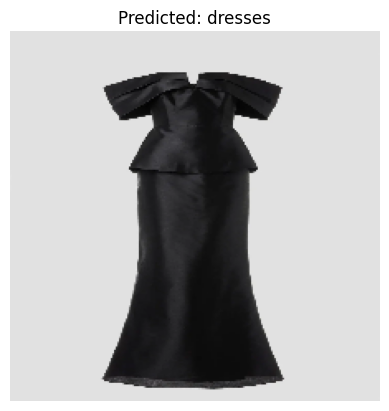

In [ ]:
import matplotlib.pyplot as plt
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np

# Function to predict user-uploaded image
def predict_uploaded_image():
    # Upload image
    uploaded = files.upload()
    image_path = list(uploaded.keys())[0]

    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Make a prediction
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)

    # Assuming you have a class indices dictionary
    class_indices = train_generator.class_indices
    class_labels = {v: k for k, v in class_indices.items()}

    # Map the predicted class to its label
    predicted_label = class_labels[predicted_class[0]]

    print(f'Predicted label: {predicted_label}')

    # Display the image with prediction
    plt.imshow(img)
    plt.title(f'Predicted: {predicted_label}')
    plt.axis('off')
    plt.show()

# Call the function to predict uploaded image
predict_uploaded_image()

Saving BM748.png to BM748.png
1/1 [==============================] - 0s 64ms/step
Predicted label: dresses


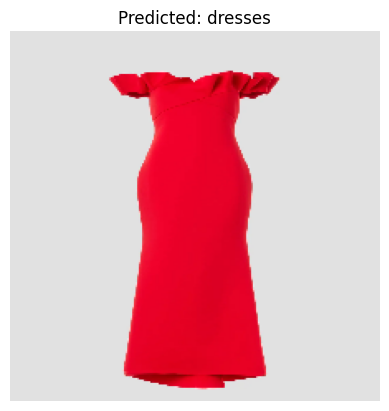

In [ ]:
import matplotlib.pyplot as plt
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np

# Function to predict user-uploaded image
def predict_uploaded_image():
    # Upload image
    uploaded = files.upload()
    image_path = list(uploaded.keys())[0]

    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Make a prediction
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)

    # Assuming you have a class indices dictionary
    class_indices = train_generator.class_indices
    class_labels = {v: k for k, v in class_indices.items()}

    # Map the predicted class to its label
    predicted_label = class_labels[predicted_class[0]]

    print(f'Predicted label: {predicted_label}')

    # Display the image with prediction
    plt.imshow(img)
    plt.title(f'Predicted: {predicted_label}')
    plt.axis('off')
    plt.show()

# Call the function to predict uploaded image
predict_uploaded_image()

Saving STD115.png to STD115.png
1/1 [==============================] - 0s 230ms/step
Predicted label: dresses


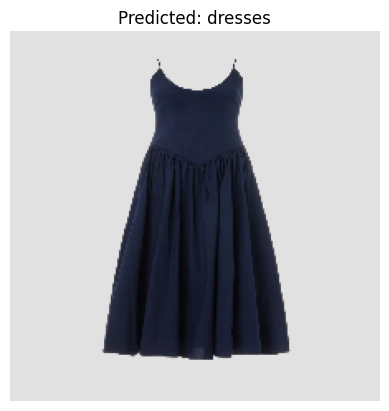

In [ ]:
import matplotlib.pyplot as plt
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np

# Function to predict user-uploaded image
def predict_uploaded_image():
    # Upload image
    uploaded = files.upload()
    image_path = list(uploaded.keys())[0]

    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Make a prediction
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)

    # Assuming you have a class indices dictionary
    class_indices = train_generator.class_indices
    class_labels = {v: k for k, v in class_indices.items()}

    # Map the predicted class to its label
    predicted_label = class_labels[predicted_class[0]]

    print(f'Predicted label: {predicted_label}')

    # Display the image with prediction
    plt.imshow(img)
    plt.title(f'Predicted: {predicted_label}')
    plt.axis('off')
    plt.show()

# Call the function to predict uploaded image
predict_uploaded_image()

In [ ]:
# Save the model after initial training
save_dir = '/content/drive/MyDrive/ENTS - H101/ML/Dataset Preparation/model'
model_filename = 'model1_initial.h5'

# Ensure the directory exists
os.makedirs(save_dir, exist_ok=True)

# Full path to the saved model
model_path = os.path.join(save_dir, model_filename)

# Save the model
model.save(model_path)
print(f"Initial model saved successfully at {model_path}")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Initial model saved successfully at /content/drive/MyDrive/ENTS - H101/ML/Dataset Preparation/model/model1_initial.h5


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
import os

# Check if GPU is available
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print("TensorFlow version:", tf.__version__)

# ImageDataGenerator for training data
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,  # Use EfficientNetB0 preprocessing
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Directory with training images
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/ENTS - H101/ML/Dataset Preparation/Last Images',
    target_size=(224, 224),  # EfficientNetB0 default input size
    batch_size=32,  # Adjust batch size based on GPU memory
    class_mode='sparse'
)

# Load the EfficientNetB0 model with weights pre-trained on ImageNet, excluding the top layer
base_model = EfficientNetB0(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Freeze the base model
base_model.trainable = False

# Create the model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')  # Use the number of classes in your dataset
])

# Compile model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

# Callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, verbose=1, min_lr=0.00001)

# Fit the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    callbacks=[reduce_lr]
)

# Define the path where you want to save the model
save_dir = '/content/drive/MyDrive/ENTS - H101/ML/Dataset Preparation/model'
initial_model_filename = 'model2_initial.h5'
os.makedirs(save_dir, exist_ok=True)
initial_model_path = os.path.join(save_dir, initial_model_filename)

# Save the model after initial training
model.save(initial_model_path)
print(f"Initial model saved successfully at {initial_model_path}")

# Optionally, unfreeze some layers and fine-tune the model
base_model.trainable = True

# Compile the model again after unfreezing layers
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(learning_rate=0.00001),  # Lower learning rate for fine-tuning
              metrics=['accuracy'])

# Fine-tune the model
history_fine = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    callbacks=[reduce_lr]
)

# Save the fine-tuned model
fine_tuned_model_filename = 'model2_fine_tuned.h5'
fine_tuned_model_path = os.path.join(save_dir, fine_tuned_model_filename)

# Save the fine-tuned model
model.save(fine_tuned_model_path)
print(f"Fine-tuned model saved successfully at {fine_tuned_model_path}")


Num GPUs Available:  0
TensorFlow version: 2.15.0
Found 956 images belonging to 10 classes.
16705208/16705208 [==============================] - 0s 0us/step
Epoch 1/10
29/29 [==============================] - ETA: 0s - loss: 1.1559 - accuracy: 0.6255 

29/29 [==============================] - 311s 10s/step - loss: 1.1559 - accuracy: 0.6255 - lr: 0.0010
Epoch 2/10
29/29 [==============================] - ETA: 0s - loss: 0.6246 - accuracy: 0.7835

29/29 [==============================] - 88s 3s/step - loss: 0.6246 - accuracy: 0.7835 - lr: 0.0010
Epoch 3/10
29/29 [==============================] - ETA: 0s - loss: 0.4597 - accuracy: 0.8247

29/29 [==============================] - 90s 3s/step - loss: 0.4597 - accuracy: 0.8247 - lr: 0.0010
Epoch 4/10
29/29 [==============================] - ETA: 0s - loss: 0.4121 - accuracy: 0.8647

29/29 [==============================] - 93s 3s/step - loss: 0.4121 - accuracy: 0.8647 - lr: 0.0010
Epoch 5/10
29/29 [==============================] - ETA: 0s - loss: 0.3349 - accuracy: 0.8896

29/29 [==============================] - 96s 3s/step - loss: 0.3349 - accuracy: 0.8896 - lr: 0.0010
Epoch 6/10
29/29 [==============================] - ETA: 0s - loss: 0.3086 - accuracy: 0.8994

29/29 [==============================] - 90s 3s/step - loss: 0.3086 - accuracy: 0.8994 - lr: 0.0010
Epoch 7/10
29/29 [==============================] - ETA: 0s - loss: 0.2740 - accuracy: 0.9058

29/29 [==============================] - 91s 3s/step - loss: 0.2740 - accuracy: 0.9058 - lr: 0.0010
Epoch 8/10
29/29 [==============================] - ETA: 0s - loss: 0.2374 - accuracy: 0.9199

29/29 [==============================] - 90s 3s/step - loss: 0.2374 - accuracy: 0.9199 - lr: 0.0010
Epoch 9/10
29/29 [==============================] - ETA: 0s - loss: 0.2335 - accuracy: 0.9232

29/29 [==============================] - 90s 3s/step - loss: 0.2335 - accuracy: 0.9232 - lr: 0.0010
Epoch 10/10
29/29 [==============================] - ETA: 0s - loss: 0.2167 - accuracy: 0.9242

29/29 [==============================] - 96s 3s/step - loss: 0.2167 - accuracy: 0.9242 - lr: 0.0010


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Initial model saved successfully at /content/drive/MyDrive/ENTS - H101/ML/Dataset Preparation/model/model2_initial.h5
Epoch 1/10
29/29 [==============================] - ETA: 0s - loss: 1.6825 - accuracy: 0.4026

29/29 [==============================] - 295s 9s/step - loss: 1.6825 - accuracy: 0.4026 - lr: 1.0000e-05
Epoch 2/10
29/29 [==============================] - ETA: 0s - loss: 1.4642 - accuracy: 0.4870

29/29 [==============================] - 267s 9s/step - loss: 1.4642 - accuracy: 0.4870 - lr: 1.0000e-05
Epoch 3/10
29/29 [==============================] - ETA: 0s - loss: 1.3313 - accuracy: 0.5463

29/29 [==============================] - 278s 9s/step - loss: 1.3313 - accuracy: 0.5463 - lr: 1.0000e-05
Epoch 4/10
29/29 [==============================] - ETA: 0s - loss: 1.1755 - accuracy: 0.6158

29/29 [==============================] - 272s 9s/step - loss: 1.1755 - accuracy: 0.6158 - lr: 1.0000e-05
Epoch 5/10
29/29 [==============================] - ETA: 0s - loss: 1.0686 - accuracy: 0.6483

29/29 [==============================] - 259s 9s/step - loss: 1.0686 - accuracy: 0.6483 - lr: 1.0000e-05
Epoch 6/10
29/29 [==============================] - ETA: 0s - loss: 0.9572 - accuracy: 0.7024

29/29 [==============================] - 261s 9s/step - loss: 0.9572 - accuracy: 0.7024 - lr: 1.0000e-05
Epoch 7/10
29/29 [==============================] - ETA: 0s - loss: 0.9185 - accuracy: 0.7056

29/29 [==============================] - 259s 9s/step - loss: 0.9185 - accuracy: 0.7056 - lr: 1.0000e-05
Epoch 8/10
29/29 [==============================] - ETA: 0s - loss: 0.8285 - accuracy: 0.7468

29/29 [==============================] - 261s 9s/step - loss: 0.8285 - accuracy: 0.7468 - lr: 1.0000e-05
Epoch 9/10
29/29 [==============================] - ETA: 0s - loss: 0.8177 - accuracy: 0.7468

29/29 [==============================] - 260s 9s/step - loss: 0.8177 - accuracy: 0.7468 - lr: 1.0000e-05
Epoch 10/10
29/29 [==============================] - ETA: 0s - loss: 0.7611 - accuracy: 0.7673

29/29 [==============================] - 261s 9s/step - loss: 0.7611 - accuracy: 0.7673 - lr: 1.0000e-05
Fine-tuned model saved successfully at /content/drive/MyDrive/ENTS - H101/ML/Dataset Preparation/model/model2_fine_tuned.h5


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
import os


Saving RL181.png to RL181 (3).png
1/1 [==============================] - 2s 2s/step
Predicted label: pants


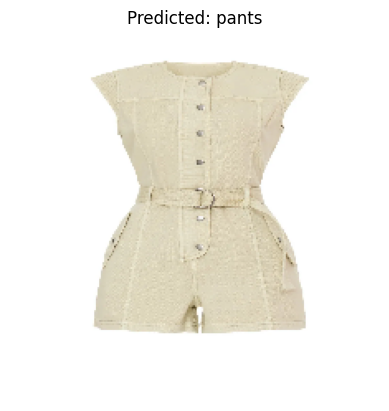

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Load the saved model
model_path = '/content/drive/MyDrive/ENTS - H101/ML/Dataset Preparation/model/model2_initial.h5'
model = load_model(model_path)

# Function to predict user-uploaded image
def predict_uploaded_image():
    # Upload image
    uploaded = files.upload()
    image_path = list(uploaded.keys())[0]

    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(224, 224))  # Ensure the target size matches the model's input size
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)  # Ensure the preprocessing matches the training phase

    # Make a prediction
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)

    # Assuming you have a class indices dictionary
    # Here, `train_generator.class_indices` is used to get the mapping
    class_indices = train_generator.class_indices
    class_labels = {v: k for k, v in class_indices.items()}

    # Map the predicted class to its label
    predicted_label = class_labels[predicted_class[0]]

    print(f'Predicted label: {predicted_label}')

    # Display the image with prediction
    plt.imshow(img)
    plt.title(f'Predicted: {predicted_label}')
    plt.axis('off')
    plt.show()

# Call the function to predict uploaded image
predict_uploaded_image()
